<a href="https://colab.research.google.com/github/Goyo0117970/IA-en-la-ciencia-de-datos/blob/main/IA_aplicada_a_ciencia_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <strong><font color="7b71ff">IA aplicada a Data Science: Utilizando IA en la construcción de visualizaciones de datos</font></strong>


---

<img src="https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/logos/logo_branca_fundo_azul.png" alt="inserir alt">

# **Aula 1 - Conociendo los datos**

 Zoop es una gran minorista que atiende a todas las regiones de México a través de su e-commerce. Es conocida por la amplia variedad de productos que ofrece, buscando satisfacer a todo tipo de público. Posee una serie de centros de distribución (CDs) para la entrega de sus productos, la mayoría de ellos situados en el estado de Mexico.

Para gestionar su alcance, así como la facturación de su sector en tiendas online, consolida los datos en diferentes períodos de tiempo y evalúa estos datos para generar insights y tomar decisiones estratégicas en su negocio. En este proyecto, tendremos acceso a los datos de parte de su clientela de e-commerce durante el año 2023.

Tú, como analista de datos de la empresa, necesitarás generar visualizaciones que ayuden en la elaboración de informes de acuerdo con algunas premisas proporcionadas por las partes interesadas, realizando un rápido análisis de la clientela que tenemos en la tienda virtual y de la facturación de la empresa.

**Problema de negocio:**

El equipo de datos de Zoop necesita extraer los datos y generar información a través de visuales que puedan presentarse a la directiva de la empresa, destacando los datos de facturación, perfil del cliente y otros indicadores que puedan ayudar en la toma de decisiones en su tienda online.

**Base de datos**

Vamos a importar dos bases de datos:

Datos de los clientes del e-commerce de Zoop, separados por el código identificador de la compra.

Datos de ventas del e-commerce de Zoop en 2023, separados por el código identificador de la compra.

Estos datos se leerán desde el repositorio compartido en GitHub.

**Desafío**

Tú, como analista de datos del equipo de datos de Zoop, tienes el desafío de extraer los datos de ambas bases y construir visualizaciones que puedan agregar valor a la presentación de los resultados de Zoop en 2023. Para ello, se te presentarán 7 preguntas para que puedas contribuir en la construcción del storytelling de las ventas de la empresa.

Para agilizar el proceso de análisis exploratorio de datos (AED) y la creación de visuales, utilizaremos la IA de ChatGPT como nuestra asistente, teniendo en cuenta el corto plazo para los análisis y la calidad de la entrega.

## **1.2 - Obteniendo los datos**

---



Vamos inicialmente a proveer el link del repositorio con las dos bases que utilizaremos en el proyecto:

In [1]:
url_clientes = "https://gist.githubusercontent.com/ahcamachod/d08898e1cc84c7271856e78d9558ca3d/raw/2f7e1fa53711efe6433a5c5ec79948f600591cb9/clientes_zoop.csv"
url_ventas = "https://gist.githubusercontent.com/ahcamachod/966d7162a3c3a2769b8770b35abf1bcc/raw/d79941b3fa46a450f3611589abd8663399c1277b/ventas_zoop.csv"

Después de esta etapa, vamos a crear 2 dataframes con los datos de los clientes y de las ventas de Zoop separadamente y realizar una pequeña verificación en las tablas extraídas.

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
clientes = pd.read_csv(url_clientes)
clientes.head()

,ID_compra,ID_cliente,ciudad,estado,region,edad,sexo_biologico,cashback,nota
0,904,8972,Oaxaca de Juárez,Oaxaca,Sur,49,Masculino,No,9
1,4613,5120,Ciudad de México,Ciudad de México,Centro,49,Femenino,No,9
2,5579,1847,Ciudad de México,Ciudad de México,Centro,24,Femenino,No,8
3,2405,2846,Ciudad de México,Ciudad de México,Centro,38,Femenino,Sí,7
4,2485,2715,Chihuahua,Chihuahua,Noroeste,30,Femenino,No,10


In [4]:
ventas = pd.read_csv(url_ventas)
ventas.head()

,ID_compra,fecha,horario,categoria,precio_unitario,cantidad,envio,metodo_pago
0,6,2023-01-03,20:40,Electrónicos,4457.9,4,713.26,Paypal
1,5,2023-01-03,21:48,Herramientas y construcción,115.9,1,0.00,Transferencia
2,9,2023-01-03,17:08,Belleza e higiene,68.9,2,13.78,Tarjeta de Crédito
3,4,2023-01-03,14:29,Herramientas y construcción,80.9,5,40.45,Transferencia
4,8,2023-01-03,18:02,Belleza e higiene,165.0,4,0.00,Transferencia


In [5]:
ventas.tail()

,ID_compra,fecha,horario,categoria,precio_unitario,cantidad,envio,metodo_pago
6164,6141,2023-12-31,17:49,Electrodomésticos,1509.9,5,377.48,Tarjeta de Crédito
6165,6148,2023-12-31,23:02,Papelería y oficina,14.0,2,3.36,Transferencia
6166,6123,2023-12-31,21:25,Alimentos y bebidas,77.9,1,7.79,Tarjeta de Crédito
6167,6147,2023-12-31,21:38,Libros,142.9,4,17.15,Tarjeta de Crédito
6168,6122,2023-12-31,22:11,Belleza e higiene,89.9,5,13.48,Tarjeta de Crédito


## **1.3 - Entendiendo los datos**

---


Ahora, vamos a explorar los datos comprendiendo lo que significan y cómo podemos relacionarlos en la construcción de las visualizaciones.

### **Base de clientes**

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Vamos a actuar como analistas de datos de una e-commerce. Recibimos dos bases de datos con los datos de los clientes y de las ventas en 2023, respectivamente.

En este primer momento, vamos a explorar la base de clientes en formato de un DataFrame de pandas, llamado "clientes". Contiene datos de los clientes que realizaron compras en la tienda virtual, siendo estos: ID de la compra, ID del cliente, la ciudad, estado y región de la compra, edad, sexo biológico, si participan en el programa de cashback y la calificación, o nota, de la compra.

Queremos hacer una breve exploración de los datos para comprender un poco sobre ellos. Recordando que los datos de esta base ya están limpios y tratados. Construye el código para ejecutar esta etapa utilizando Python con el objetivo de conocer mejor el dataframe "clientes" y algunos de sus atributos.

No es necesario utilizar "print()" para mostrar el resultado de las consultas.

,nota
region,
Centro,8.419481
Centro-Norte,8.465291
Centro-Sur,8.389034
Golfo,8.318735
Noreste,8.543550
Noroeste,8.408307
Occidente,8.456835
Sur,8.457746
Sureste,8.591398


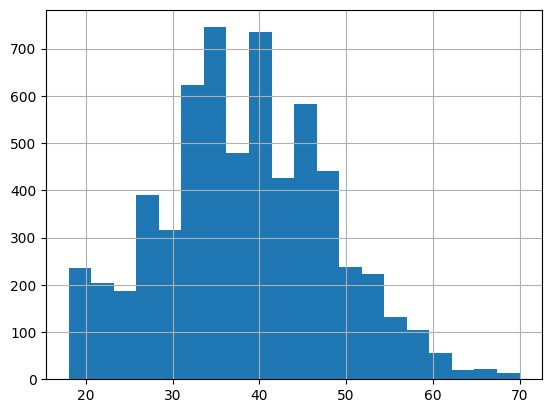

In [6]:
# Estadísticas descriptivas para columnas numéricas (como edad y calificación)
clientes.describe()

# Verificar columnas categóricas y la cantidad de valores únicos
clientes['sexo_biologico'].value_counts()
clientes['ciudad'].nunique()
clientes['estado'].nunique()
clientes['region'].value_counts()
clientes['cashback'].value_counts()

# Verificar la distribución de edades
clientes['edad'].hist(bins=20)

# Distribución de calificaciones de las compras
clientes['nota'].value_counts().sort_index()

# Verificar si hay IDs duplicados en clientes o compras
clientes['ID_cliente'].duplicated().sum()
clientes['ID_compra'].duplicated().sum()

# Cruce entre participación en cashback y sexo biológico
pd.crosstab(clientes['cashback'], clientes['sexo_biologico'])

# Edad promedio por región
clientes.groupby('region')['edad'].mean()

# Calificación promedio por región
clientes.groupby('region')['nota'].mean()


### **Base de ventas**

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora vamos explorar la base de ventas en formato de un DataFrame, llamado "ventas". Contiene datos de las ventas del comercio electrónico, que son: ID de la compra, fecha de la compra, hora de la compra, categoría del producto, precio unitario del producto, cantidad vendida, envío y el método de pago.

Queremos hacer una breve exploración de los datos para comprender un poco sobre ellos. Recordando que los datos de esta base también están limpios y tratados. Construye el código para ejecutar esta etapa utilizando Python con el objetivo de conocer mejor el dataframe "clientes" y algunos de sus atributos.

In [7]:
# Visualizar las primeras filas del DataFrame
ventas.head()

,ID_compra,fecha,horario,categoria,precio_unitario,cantidad,envio,metodo_pago
0,6,2023-01-03,20:40,Electrónicos,4457.9,4,713.26,Paypal
1,5,2023-01-03,21:48,Herramientas y construcción,115.9,1,0.00,Transferencia
2,9,2023-01-03,17:08,Belleza e higiene,68.9,2,13.78,Tarjeta de Crédito
3,4,2023-01-03,14:29,Herramientas y construcción,80.9,5,40.45,Transferencia
4,8,2023-01-03,18:02,Belleza e higiene,165.0,4,0.00,Transferencia


In [8]:
# Información general sobre el DataFrame
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_compra        6169 non-null   int64  
 1   fecha            6169 non-null   object 
 2   horario          6169 non-null   object 
 3   categoria        6169 non-null   object 
 4   precio_unitario  6169 non-null   float64
 5   cantidad         6169 non-null   int64  
 6   envio            6169 non-null   float64
 7   metodo_pago      6169 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 385.7+ KB


In [9]:
ventas['fecha']= pd.to_datetime(ventas['fecha'], format='%Y-%m-%d')

,cantidad
metodo_pago,
Paypal,1582
Tarjeta de Crédito,8663
Tarjeta de Débito,1595
Transferencia,6697


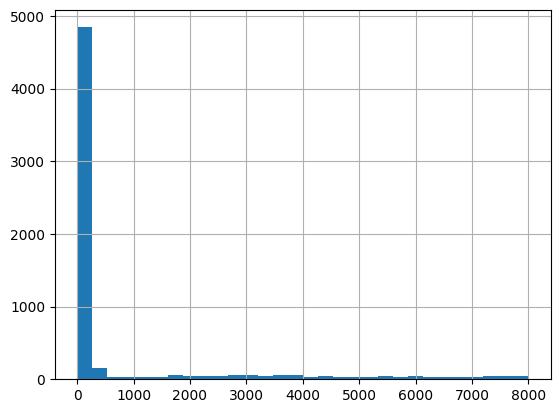

In [10]:
# Ver estadísticas descriptivas para las columnas numéricas
ventas.describe()

# Verificar el número de categorías distintas de productos
ventas['categoria'].value_counts()

# Verificar el número de métodos de pago diferentes
ventas['metodo_pago'].value_counts()

# Verificar el rango de fechas de las compras
ventas['fecha'].min(), ventas['fecha'].max()

# Verificar la distribución de compras por hora del día
ventas['horario'].value_counts().sort_index()

# Verificar si hay ID de compra duplicados (para detectar ventas múltiples por compra)
ventas['ID_compra'].duplicated().sum()

# Distribución de cantidades vendidas
ventas['cantidad'].value_counts().sort_index()

# Distribución de precios unitarios (también puede visualizarse con un histograma)
ventas['precio_unitario'].hist(bins=30)

# Verificación de la distribución del valor del envío
ventas['envio'].describe()

# Precio total por venta (puede usarse luego para análisis más detallado)
ventas['valor_total'] = (ventas['precio_unitario'] * ventas['cantidad']) + ventas['envio']
ventas[['valor_total']].describe()

# Ventas promedio por categoría
ventas.groupby('categoria')['valor_total'].mean()

# Cantidad total vendida por método de pago
ventas.groupby('metodo_pago')['cantidad'].sum()


## **1.4 - Tipos de gráficos**

---


Ya hemos explorado un poco de las dos bases del proyecto y obtuvimos algunos insights interesantes que pueden ser importantes en la construcción de nuestras visualizaciones.

Ahora, intentemos simplificar nuestro análisis consolidando los datos en una única tabla para, a partir de ahí, enfocarnos en las posibilidades de visuales combinando los datos. ¿Podrá GPT ayudarnos aquí?

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora vamos a unir las dos bases de nuestro proyecto en una sola utilizando como llave la columna "ID_compra". Además, organizaremos las columnas en la siguiente secuencia:

* ID_compra
* fecha
* horario
* categoria
* precio_unitario
* cantidad
* envio
* metodo_pago
* ID_cliente
* edad
* sexo_biologico
* ciudad
* estado
* region
* cashback
* nota

Construye un código para ejecutar esta etapa usando Python y la biblioteca Pandas.


In [11]:
df_final = pd.merge(ventas, clientes, on='ID_compra', how='inner')

In [12]:
columnas_ordenadas = [
    'ID_compra', 'fecha', 'horario', 'categoria',
    'precio_unitario', 'cantidad', 'envio', 'metodo_pago',
    'ID_cliente', 'edad', 'sexo_biologico', 'ciudad',
    'estado', 'region', 'cashback', 'nota'
]

df = df_final[columnas_ordenadas]

# Visualizar el resultado
df.head()

,ID_compra,fecha,horario,categoria,precio_unitario,cantidad,envio,metodo_pago,ID_cliente,edad,sexo_biologico,ciudad,estado,region,cashback,nota
0,6,2023-01-03,20:40,Electrónicos,4457.9,4,713.26,Paypal,6149,30,Masculino,Hermosillo,Sonora,Noroeste,Sí,10
1,5,2023-01-03,21:48,Herramientas y construcción,115.9,1,0.00,Transferencia,9491,36,Masculino,Ciudad de México,Ciudad de México,Centro,Sí,8
2,9,2023-01-03,17:08,Belleza e higiene,68.9,2,13.78,Tarjeta de Crédito,5288,39,Femenino,Aguascalientes,Aguascalientes,Centro-Norte,No,7
3,4,2023-01-03,14:29,Herramientas y construcción,80.9,5,40.45,Transferencia,9679,35,Masculino,Veracruz,Veracruz,Golfo,Sí,9
4,8,2023-01-03,18:02,Belleza e higiene,165.0,4,0.00,Transferencia,1380,50,Masculino,Ciudad de México,Ciudad de México,Centro,No,9


Ahora le pediremos a ChatGPT ideas de visuales que podamos contruir con esos datos

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora con nuestro "df" ya construido a partir de las dos bases del proyecto, vamos a iniciar un nuevo proceso. Queremos comenzar la etapa de generación de visuales que puedan ayudar en el análisis de la facturación a lo largo del año, el perfil del cliente y otros datos que puedan ser relevantes para el análisis y la construcción de nuestra narrativa.

Las columnas de "df" son:

* ID_compra: número único asignado a la compra realizada, en formato int
* fecha: fecha de la compra, en formato datetime
* horario: hora de la compra, en formato object
* categoria: categoría del producto, en formato object
* precio_unitario: precio de una unidad del producto, en formato float
* cantidad: cantidad vendida del producto, en formato int
* envio: costo de envío a ser pagado en total de la compra, en formato float
* metodo_pago: método de pago de la compra, en formato object
* ID_cliente: número único asignado al cliente, en formato int
* edad: edad del cliente, en formato int
* sexo_biologico: sexo biológico del cliente, en formato object
* ciudad: ciudad del cliente, en formato object
* estado: estado del cliente, en formato object
* region: región del cliente, en formato object
* cashback: si el cliente participa o no en el programa de cashback de la tienda, en formato object
* nota: evaluación del cliente por la compra, en formato int

El objetivo es abstraer y buscar relaciones para construir visualizaciones interesantes para el análisis de los datos de los clientes y ventas de Zoop.

Con base en la información proporcionada, ¿qué tipos de visualizaciones serían útiles para alcanzar el objetivo de analizar los datos?

In [13]:
df['mes'] = df['fecha'].dt.to_period('M')

In [14]:
df.groupby('fecha')['precio_unitario'].sum()

,precio_unitario
fecha,
2023-01-03,14263.2
2023-01-04,5113.0
2023-01-05,7630.1
2023-01-06,2958.2
2023-01-07,1427.1
...,...
2023-12-27,17549.9
2023-12-28,34965.9
2023-12-29,26584.5


In [15]:
df.groupby('categoria')['cantidad'].sum()

,cantidad
categoria,
Alimentos y bebidas,4484
Belleza e higiene,3183
Casa y aseo,3100
Electrodomésticos,1973
Electrónicos,1763
Herramientas y construcción,1396
Libros,909
Papelería y oficina,1729


In [16]:
df['mes'] = df['fecha'].dt.to_period('M')
df['valor_total'] = df['precio_unitario'] * df['cantidad'] + df['envio']
df['ticket_medio'] = df['valor_total'] / df['cantidad']
df['hora'] = pd.to_datetime(df['horario']).dt.hour

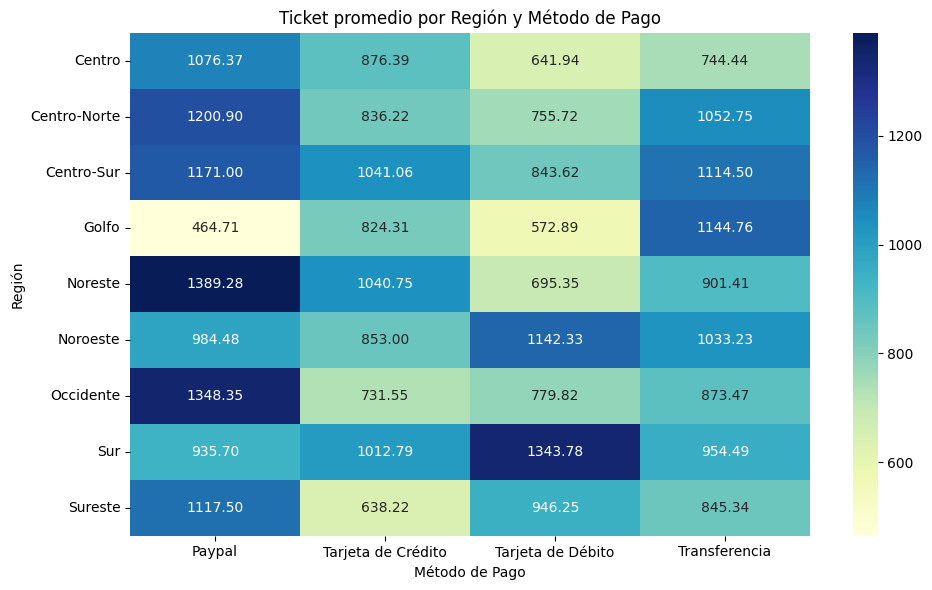

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear columna de valor total si aún no la tienes
df['valor_total'] = df['precio_unitario'] * df['cantidad'] + df['envio']

# Calcular ticket promedio por compra
df['ticket_promedio'] = df['valor_total'] / df['cantidad']

# Crear tabla dinámica: índice = región, columnas = método de pago, valores = ticket promedio
pivot_ticket = df.pivot_table(
    values='ticket_promedio',
    index='region',
    columns='metodo_pago',
    aggfunc='mean'
)

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el heatmap
sns.heatmap(pivot_ticket, annot=True, fmt=".2f", cmap='YlGnBu')

# Título y etiquetas
plt.title('Ticket promedio por Región y Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Región')

# Mostrar gráfico
plt.tight_layout()
plt.show()


# **Clase 2 - Visualizando los datos**

ChatGPT trajo algunas ideas interesantes para la creación de los gráficos.

Sin embargo, como ya tenemos algunas preguntas para guiarnos en la creación de los visuales, no vamos a seguir todas las sugerencias aquí mencionadas.

Queda como una sugerencia para ayudarte cuando estés trabajando con otras bases y tengas dificultades para pensar en qué visualizaciones podrías construir.

**Observación:** Recordando que es muy probable que los gráficos que se me señalaron, no sean necesariamente los mismos que aparecerán para ti, dado a la aleatoriedad de las respuestas de cualquier IA generativa.

## **2.1 - Definiendo los visualizaciones**

---

Después de la etapa de exploración de los datos, vamos a leer las preguntas que se plantearon en la demanda que recibimos. Así, comenzaremos a pensar en los visuales que vamos a construir con la ayuda de la IA.

### **Preguntas**

#### Ventas

1. ¿Cuáles fueron los métodos de pago más utilizados en 2023?
2. ¿Cuál fue la facturación por categoría en 2023?
3. ¿Cómo fueron las ventas a lo largo de los meses en 2023?
4. ¿Cómo se divide la venta por trimestre por método de pago? ¿Existe un período en que algún tipo de pago se destaca?


#### Perfil del cliente

5. ¿Cuál es la proporción de la clientela que participa en nuestro programa de cashback?
6. ¿Cómo están distribuidas las evaluaciones del producto? ¿Tenemos buenos números generales?
7. ¿Cómo se distribuye nuestro público por edad y sexo biológico? ¿Existe un grupo que se destaca?

Inicialmente, vamos a hacer la primera versión de los gráficos, aún no refinados con los elementos visuales, para más adelante ir añadiendo las diversas técnicas de storytelling.

### **1ra Pregunta:** ¿Cuáles fueron los métodos de pago más utilizados en 2023?

Le vamos pedir a ChatGPT que nos auxilie en la construcción de este visual. Primero, trataremos los datos generando una tabla resumida (que también es una especie de visual) y luego construiremos el primer gráfico.

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un visual que presente cuáles métodos de pago fueron los más utilizados.

En "df", tenemos la columna "metodo_pago" con los 4 tipos de pago utilizados en la compra.

Inicialmente, queremos construir una tabla llamada "metodos_de_pago" que resuma los datos de esta columna y, a continuación, deseamos crear una visualización que muestre la cantidad de esos métodos de pago presentes en la tabla "metodo_pago".

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Crear la tabla de resumen
metodos_de_pago = df['metodo_pago'].value_counts().reset_index()
metodos_de_pago.columns = ['metodo_pago', 'cantidad']
# Mostrar la tabla opcionalmente
metodos_de_pago


,metodo_pago,cantidad
0,Tarjeta de Crédito,2851
1,Transferencia,2244
2,Tarjeta de Débito,547
3,Paypal,527


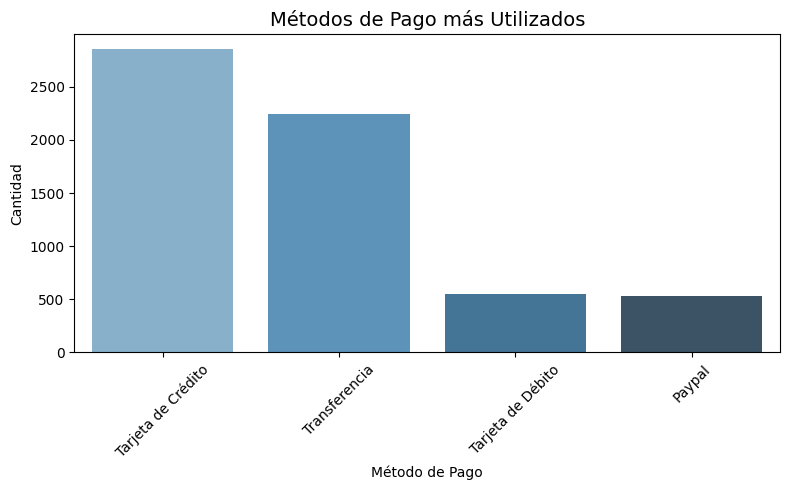

In [19]:
 # Paso 2: Crear la visualización
plt.figure(figsize=(8, 5))
sns.barplot(data=metodos_de_pago, x='metodo_pago', y='cantidad', palette='Blues_d')

# Títulos y etiquetas
plt.title('Métodos de Pago más Utilizados', fontsize=14)
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar gráfico
plt.show()



<font color="7b71ff" size=4> Comentarios: </font>

---

Podemos observar que, incluso sin especificar el tipo de gráfico, por la forma en que presentamos los datos a ChatGPT, logró representar con éxito un visual que muestra la información deseada. Un gráfico de barras es realmente ideal para representar las cantidades de una o más categorías de datos.

Iremos ajustando poco a poco los visuales para que se adecuen a nuestro público y reflejen la identidad visual de la empresa.


## **2.2 - Comparando los datos**

---

### **2da Pregunta:** ¿Cuál fue la facturación por categoria em 2023?

**Observación:** Para la facturación, consideraremos aquí el producto entre el precio unitario y la cantidad, sumados al costo de envío de cada producto.


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gráfico de barras horizontales que muestre la facturación por categoría de Zoop.

En "df", tenemos las siguientes columnas:
* categoria: categorías de los productos
* precio_unitario: precio de una unidad del producto
* cantidad: cantidad vendida del producto
* envio: costo de envío total de la compra.

Deseamos crear una visualización que muestre la facturación de cada categoría, donde la facturación se calcula multiplicando el precio unitario por la cantidad y sumando el costo de envío.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.


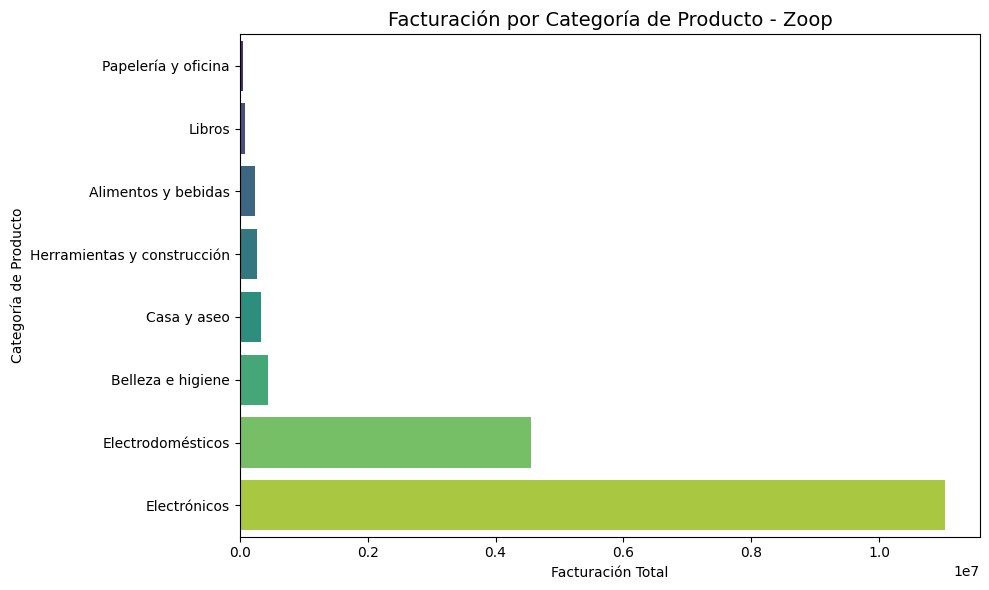

In [20]:
# Paso 1: Calcular la facturación por fila
df['facturacion'] = df['precio_unitario'] * df['cantidad'] + df['envio']

# Paso 2: Agrupar por categoría y sumar la facturación
facturacion_categoria = df.groupby('categoria')['facturacion'].sum().sort_values()

# Paso 3: Crear gráfico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x=facturacion_categoria.values, y=facturacion_categoria.index, palette='viridis', orient='h')

# Títulos y etiquetas
plt.title('Facturación por Categoría de Producto - Zoop', fontsize=14)
plt.xlabel('Facturación Total')
plt.ylabel('Categoría de Producto')
plt.tight_layout()

# Mostrar gráfico
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Aquí especificamos el tipo de gráfico, guiando a ChatGPT en la creación de nuestro visual. Podemos notar que en un gráfico de barras el enfoque está más centrado en las categorías, además de ser una forma más fluida de leer textos que podrían ser demasiado extensos para un gráfico de columnas.


### **3a Pregunta:** ¿Cómo fueron las ventas a lo largo de los meses en 2023?


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gráfico de líneas que muestre las ventas totales mensuales de Zoop.

En "df", tenemos las siguientes columnas:
* fecha: con las fechas de las compras en formato datetime (`aaaa-mm-dd`)
* facturación: calculada como el producto del precio unitario y la cantidad, sumado al costo de envío de cada venta.

Deseamos crear una visualización que muestre las ventas por mes. Primero, agrupa los datos por mes y luego crea una nueva columna llamada "mes" que contenga el nombre de cada mes, traduciendo los meses del índice mediante el siguiente diccionario. Utiliza la columna "fecha" para agrupar los datos y construir el gráfico. La columna "mes" solo debe usarse para cambiar las etiquetas del eje x.

```
meses = {
    'January': 'Ene',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dic'
}
```


Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.


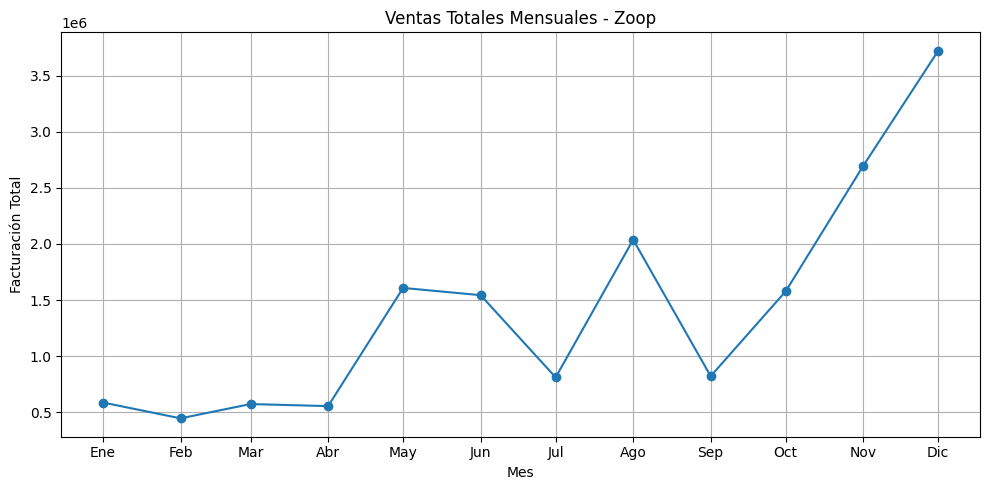

In [21]:
meses = {
    'January': 'Ene',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dic'
}
# Paso 1: Extraer el mes de la columna 'fecha'
df['mes_datetime'] = df['fecha'].dt.to_period('M').dt.to_timestamp()

# Paso 2: Agrupar por mes y sumar la facturación
ventas_mensuales = df.groupby('mes_datetime')['facturacion'].sum().reset_index()

# Paso 3: Crear columna con nombre del mes traducido
ventas_mensuales['mes'] = ventas_mensuales['mes_datetime'].dt.strftime('%B').map(meses)

# Paso 4: Crear el gráfico de líneas
plt.figure(figsize=(10, 5))
plt.plot(ventas_mensuales['mes_datetime'], ventas_mensuales['facturacion'], marker='o', linestyle='-')

# Personalizar eje x con los nombres de los meses traducidos
plt.xticks(ticks=ventas_mensuales['mes_datetime'], labels=ventas_mensuales['mes'])

# Títulos y etiquetas
plt.title('Ventas Totales Mensuales - Zoop')
plt.xlabel('Mes')
plt.ylabel('Facturación Total')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Cuando tenemos una cantidad mayor de períodos en nuestros datos, vale la pena recurrir a gráficos de líneas, que son ideales para series temporales. Dado que nuestros datos son mensuales, utilizar un gráfico de columnas, por ejemplo, reduciría la percepción de la secuencia de los datos. Las líneas ofrecen una mayor sensación de continuidad.

Siéntete libre de formular algunas hipótesis sobre los momentos de alta y baja en las compras.


##**2.3 - Componiendo datos dinámicos**


Construimos algunos visuales interesantes para comparar los datos, mostrando las facturaciones de Zoop. Ahora, pasemos a una nueva categoría de visuales: composición.

Vamos a hacer una composición dinámica de los datos. Para ello, añadiremos más variables al análisis, incorporando 3 variables diferentes, siendo una de ellas categórica.

###**4a Pregunta:** ¿Cómo está dividida la venta por trimestre por método de pago? ¿Existe algún período en el que algún tipo de pago se destaque?


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gráfico de barras apiladas que muestre las ventas por trimestre en relación con el método de pago de Zoop.

En "df", tenemos las siguientes columnas:
* fecha: con las fechas de las compras en formato datetime (`aaaa-mm-dd`)
* facturacion: con los valores de las ventas
* metodo_pago: con el método de pago elegido en la compra

Deseamos crear una visualización que muestre las ventas por trimestre, agrupando los métodos de pago de cada trimestre correspondientes a cada compra.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.


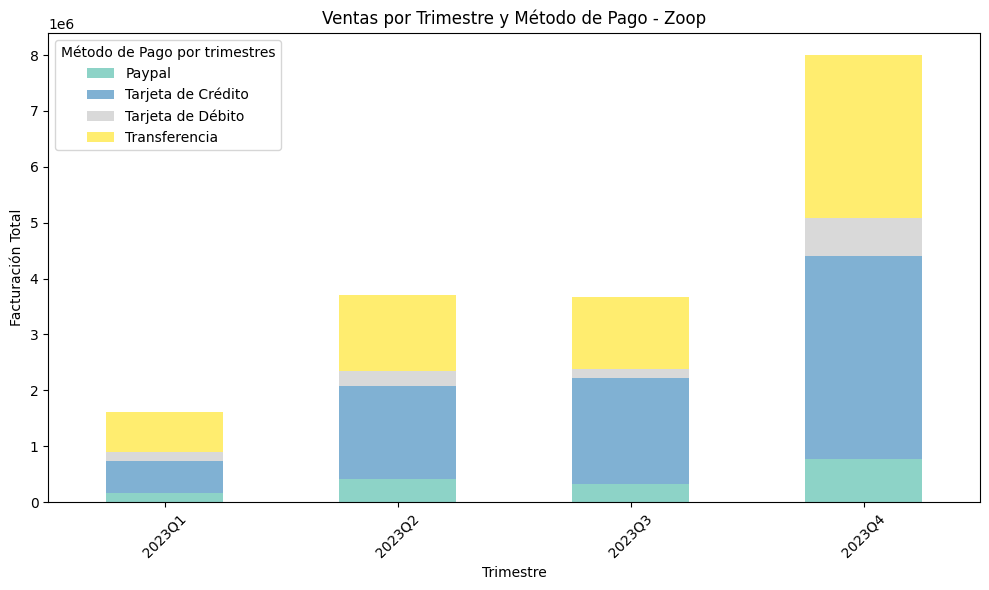

In [22]:
# Paso 1: Crear columna con el trimestre correspondiente a cada compra
df['trimestre'] = df['fecha'].dt.to_period('Q').astype(str)

# Paso 2: Agrupar datos por trimestre y método de pago, sumando la facturación
ventas_trimestre_pago = df.groupby(['trimestre', 'metodo_pago'])['facturacion'].sum().unstack(fill_value=0)

# Paso 3: Crear gráfico de barras apiladas
ventas_trimestre_pago.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')

# Títulos y etiquetas
plt.title('Ventas por Trimestre y Método de Pago - Zoop')
plt.xlabel('Trimestre')
plt.ylabel('Facturación Total')
plt.legend(title='Método de Pago por trimestres')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar gráfico
plt.show()


<font color="7b71ff" size=4> Comentarios: </font>

---

El gráfico de columnas apiladas añade a la comparación entre períodos o categorías, la comparación también entre los datos de cada período/categoría. Es como si pusiéramos una "lupa" en cada columna y visualizáramos la composición de cada una de acuerdo con la variable deseada (aquí, las formas de pago).

Siéntete libre de formular algunas hipótesis sobre las ventas por trimestre combinadas con el tipo de pago y qué ideas podemos obtener de esta base de datos.


## **3.1 - Componiendo datos estáticos**

---

Inicialmente, presentaremos un ejemplo de cómo podemos utilizar la comparación de datos estáticos, es decir, un recorte en el tiempo o de las variables que poseemos.

### **5ª Pregunta:** ¿Cuál es la proporción de la clientela que participa en nuestro programa de cashback?

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gráfico que muestre la proporción de usuarios(as) que están participando en el programa de cashback de Zoop.

En "df", tenemos la columna "cashback" que contiene estos datos.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.


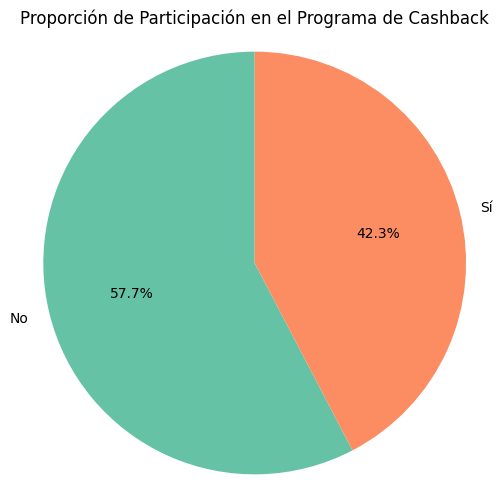

In [23]:
participacion_cashback = df['cashback'].value_counts()

# Paso 2: Crear gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(
    participacion_cashback,
    labels=participacion_cashback.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66c2a5', '#fc8d62']
)
plt.title('Proporción de Participación en el Programa de Cashback')
plt.axis('equal')  # Asegura que el círculo esté bien formado
plt.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

¿Podrías utilizar el color rojo y mantener el azul y cambiar el gráfico anterior a uno tipo rosquilla?

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.


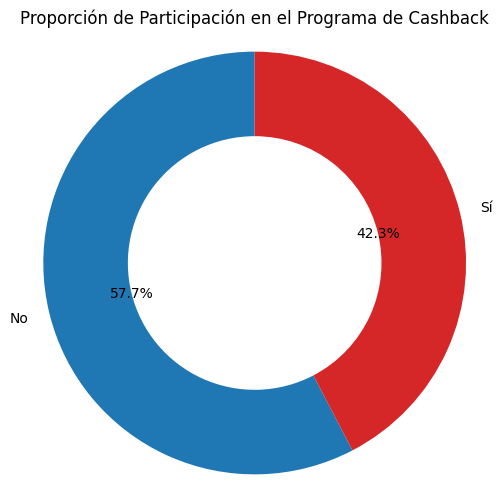

In [24]:
participacion_cashback = df['cashback'].value_counts()

# Paso 2: Crear gráfico tipo rosquilla
colors = ['#1f77b4', '#d62728']  # Azul y rojo

plt.figure(figsize=(6, 6))
plt.pie(
    participacion_cashback,
    labels=participacion_cashback.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'width': 0.4}  # Esto convierte el gráfico en una rosquilla
)

# Título y estilo
plt.title('Proporción de Participación en el Programa de Cashback')
plt.axis('equal')  # Asegura que el gráfico sea circular

# Mostrar gráfico
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

¡Mira eso! Una vez más, la IA nos presentó una buena idea de qué gráfico aplicar para este caso, pero ¿notaste que "ella" no tiene idea de los datos que poseemos?

Debemos estar atentos a esto, ya que solo le proporcionamos los nombres de las columnas y los datos que había allí. La IA no puede saber si un valor es positivo o negativo, por ejemplo. Por eso, el "no" estaba en azul y el "sí" en verde. En el siguiente prompt, le indicamos que sustituyera el color verde por el rojo (sin mencionar el valor real de los datos) y pedimos una modificación en el visual.

¿Qué tal si experimentas hacer otros pedidos y ves cómo se comporta ChatGPT?

Hablando del gráfico, los gráficos de sectores son ideales para pocas categorías de datos, preferiblemente datos dicotómicos (2 categorías, como sí y no, gato y perro...). Representan la proporción de los datos de manera estática.

## **3.2 - Distribuyendo Datos**

---


Con la ayuda de la IA, generaremos más gráficos que serán importantes para la construcción del storytelling del informe de Zoop, según lo solicitado. Ahora, partiendo de la distribución de datos, vamos a analizar el perfil de los clientes y cómo evalúan sus compras en Zoop.

### **6ª Pregunta:** ¿Cómo están distribuidas las calificaciones de la compra? ¿Tenemos buenos números en general?  


Vamos a pedirle a ChatGPT que nos ayude a construir este visual. Veamos si esta IA puede representar estos datos con un visual adecuado.

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gráfico que muestre la distribución de las evaluaciones del público en relación con las compras realizadas en la tienda online.

En "df", tenemos la columna "nota" con las calificaciones otorgadas por cada usuario en relación con la compra que realizaron, que varían de 0 a 10 en números enteros.

Deseamos crear una visualización que muestre la distribución de estos datos.

Utiliza las bibliotecas de visualización de datos de Python para crear este gráfico.


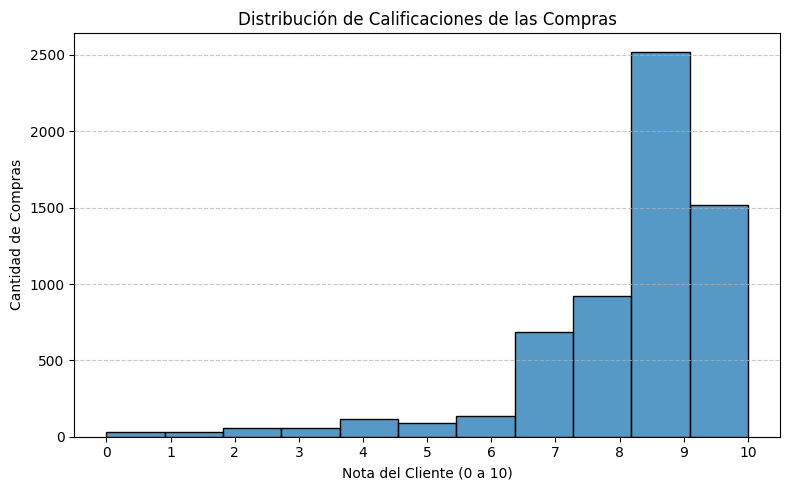

In [25]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='nota', bins=11, kde=False, color='#1f77b4', edgecolor='black')

# Títulos y etiquetas
plt.title('Distribución de Calificaciones de las Compras')
plt.xlabel('Nota del Cliente (0 a 10)')
plt.ylabel('Cantidad de Compras')
plt.xticks(range(0, 11))  # Asegura que aparezcan todas las notas de 0 a 10
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar gráfico
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Una vez más, no necesitamos especificar directamente el tipo de gráfico, ya que al mencionar la distribución de valores numéricos de una simple columna, ChatGPT logró interpretar y proporcionar el código para un histograma de columnas. Este gráfico es ideal para presentar la distribución de una muestra de datos o población. Cada columna aquí representa la frecuencia de repetición de un valor.

¿Te gustaría experimentar haciendo lo mismo solo con las edades?


### **7ª Pregunta:** ¿Cómo está distribuida nuestra audiencia por edad y sexo biológico? ¿Existe algún grupo que sobresalga?


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gráfico que muestre la distribución de nuestra audiencia por edad y sexo biológico.

En "df", tenemos las columnas:
* edad: edad de la persona que realizó la compra
* sexo_biologico: sexo biológico de la persona que realizó la compra, con datos categóricos

Deseamos crear una visualización que muestre la distribución de estos datos.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.


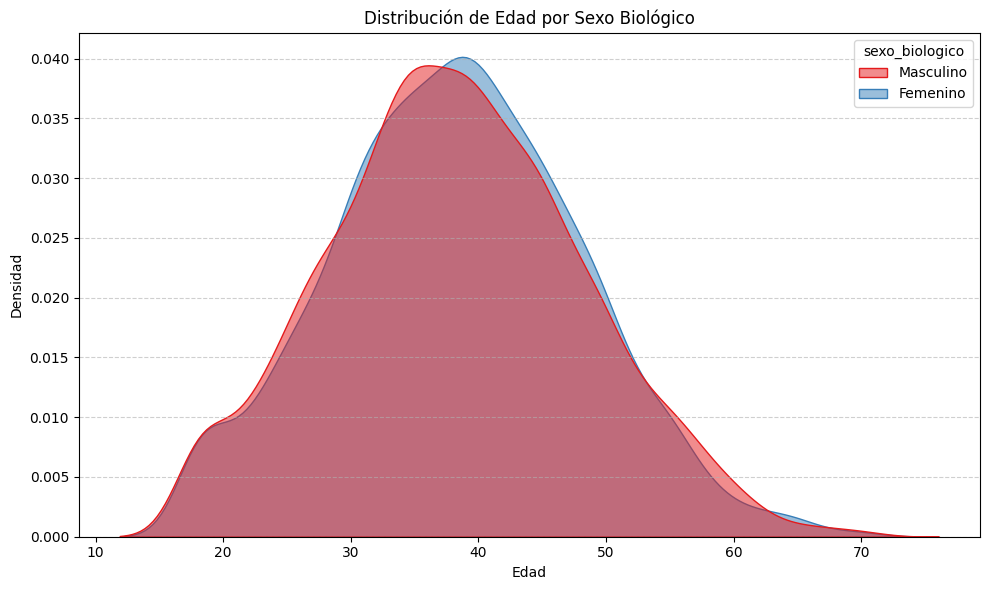

In [26]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='edad', hue='sexo_biologico', fill=True, common_norm=False, palette='Set1', alpha=0.5)

# Títulos y etiquetas
plt.title('Distribución de Edad por Sexo Biológico')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

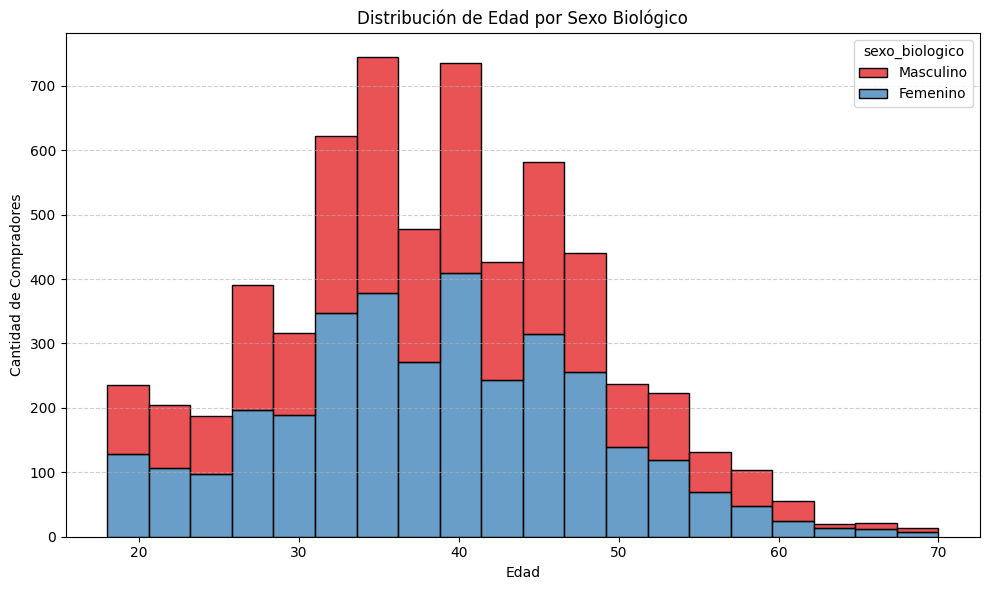

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='edad', hue='sexo_biologico', multiple='stack', palette='Set1', bins=20)

plt.title('Distribución de Edad por Sexo Biológico')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Compradores')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---
El gráfico generado es poco práctico, ya que compila los datos del sexo biológico 'Masculino' y 'Femenino' en el gráfico de violín. Necesitamos darle una instrucción adicional a GPT para elegir un visual más adecuado.


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Creo que podemos mejorar este gráfico. ¿Qué te parece cambiar a un boxplot?


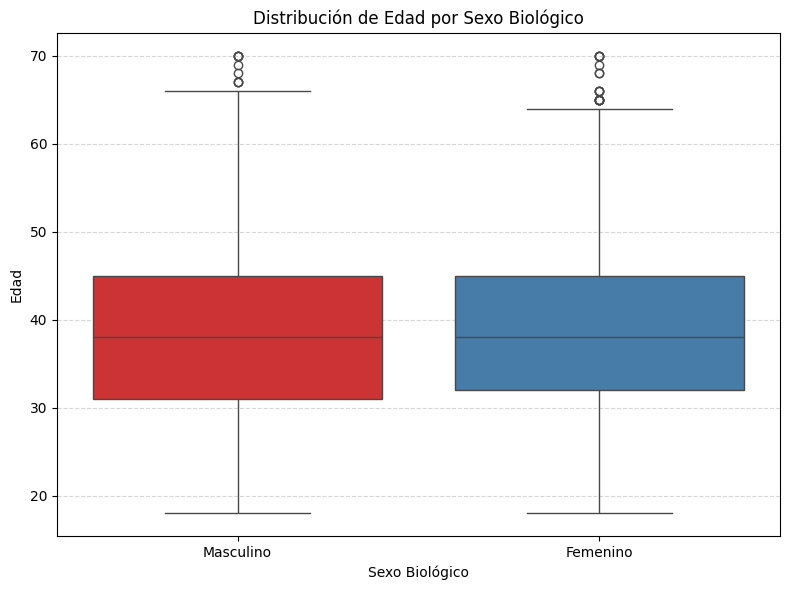

In [29]:
# Crear gráfico boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sexo_biologico', y='edad', palette='Set1')

# Títulos y etiquetas
plt.title('Distribución de Edad por Sexo Biológico')
plt.xlabel('Sexo Biológico')
plt.ylabel('Edad')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Mostrar gráfico
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Esta vez fue necesario guiar a la IA para generar una visualización mejor para nuestros análisis.

El gráfico representado es un boxplot (diagrama de caja) que es ideal para representar un conjunto de datos de acuerdo con 5 medidas de interés: valor máximo, mínimo, 1º cuartil (donde están situados el 25% de los datos), 2º cuartil o mediana (donde están situados el 50% de los datos) y 3º cuartil (donde están situados el 75% de los datos).

¿Recuerdas el `describe()`? Este gráfico presenta en un solo elemento gran parte de los datos que la función muestra en tabla.

Concluimos la 1ª versión de los 7 visuales que utilizaremos en nuestro proyecto. Ahora, pasaremos a la aplicación de las técnicas de storytelling para mejorar los visuales y adaptarlos a la identidad visual de Zoop antes de la exportación.


## **4.1 - Definiendo los colores del proyecto**

---


Ahora, vamos a explorar la importancia de los colores en la visualización de datos, discutir cómo las personas perciben e interpretan la información visual, y abordar la diferencia entre la capacidad de la inteligencia artificial y la visión humana en lo que respecta a la elección de colores y accesibilidad.



### Paleta de colores de Zoop:

<img src="https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/zoop_paleta_cores.png" alt="inserir alt" width=480>

&nbsp;

#### Paleta del proyecto

|Rojo|||
|------|------|------|
| Rojo_1 |Rojo_2 |Rojo_3 |
|#e23155 | #cc2c4e| #b32742 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/VERMELHO_1.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/VERMELHO_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/VERMELHO_3.png) |

&nbsp;

|Azul|||
|------|------|------|
| AZUL_1 |AZUL_2 |AZUL_3 |
|#203f75 | #1c3867| #19325b |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AZUL_1.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AZUL_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AZUL_3.png) |

&nbsp;

|Gris||||||
|------|------|------|------|------|------|
|BLANCO| GRIS_1 |GRIS_2 |GRIS_3 |GRIS_4 |GRIS_5 |
|#ffffff | #ebebeb | #d9d9d9| #cccccc | #555655| #231f20 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/BRANCO.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_1.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_3.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_4.png)|![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_5.png)|

&nbsp;

|Aqua|||
|------|------|------|
| AQUA_1 |AQUA_2 |AQUA_3 |
|#addcd4 | #9fccc5| #96bfb9 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AQUA_1.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AQUA_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AQUA_3.png) |

&nbsp;


In [30]:
# Adicionamos los colores al proyecto
ROJO_1,	ROJO_2,	ROJO_3 = "#e23155",	"#cc2c4e", "#b32742"
AZUL_1,	AZUL_2,	AZUL_3 = "#203f75",	"#1c3867", "#19325b"
BLANCO,GRIS_1, GRIS_2, GRIS_3, GRIS_4,	GRIS_5 = "#ffffff", "#ebebeb",	"#d9d9d9", "#cccccc", "#555655", "#231f20"
AQUA_1,	AQUA_2,	AQUA_3 = "#addcd4",	"#9fccc5", "#96bfb9"

<font size=5> ***¿Por qué definimos nosotros mismos los colores del proyecto?*** </font>


1. **Percepción humana de los colores:**

Nuestro cerebro interpreta los colores de manera única, asociando emociones y significados a cada tonalidad. Es importante, al elegir los colores para representar datos, considerar la percepción humana para asegurar que la información se transmita de manera clara y eficaz. Además de seguir la identidad visual de Zoop, es decir, dar esa sensación de que el visual es de Zoop.

2. **Accesibilidad:**

Ciertas combinaciones de colores pueden ser difíciles de percibir para personas con deficiencias visuales. Nuestra responsabilidad como desarrolladores es garantizar que nuestras visualizaciones sean inclusivas. Aquí seguiremos algunas directrices y recomendaciones para crear gráficos accesibles.

3. **IA vs. elección de colores:**

Mientras que la IA puede realizar tareas complejas, como análisis de datos y reconocimiento de patrones, aún no posee el discernimiento humano cuando se trata de elegir colores significativos y garantizar la accesibilidad. Aquí es donde entra nuestra intervención creativa y consideración humana.

4. **Experiencia visual:**

¿Las personas pueden entender la información transmitida por los gráficos? ¿Existe algún "conflicto" entre los colores que perjudica la claridad del mensaje? Vamos a explorar técnicas para mejorar la experiencia visual, como el contraste adecuado, la elección cuidadosa de los colores de la paleta y el destaque de elementos clave.

¿Vamos ahora a sumergirnos en la práctica e incorporar estos conceptos a nuestro proyecto?


## **4.2 - Añadiendo etiquetas y rótulos**

Ya hemos creado anteriormente los 7 visuales y definido los colores del proyecto. Ahora, vamos a elegir solo uno de los visuales para comprender cómo podemos utilizar la IA para agregar los colores ideales, las etiquetas de los datos, títulos y etiquetas de los ejes.

Entonces, tomaremos el código de ese primer gráfico (Métodos de pago utilizados) y exploraremos estos cambios a través de la utilización de la IA.

<strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora llegó el momento de refinar nuestras visualizaciones. Comencemos con el primer gráfico que hicimos, el de los métodos de pago.

Nuestro gráfico necesita seguir la identidad visual de Zoop, con el fondo de la figura y del gráfico en el color GRIS_1, las columnas en el color ROJO_1 y el tamaño de la figura debe ser de (10, 6).

El título de la figura es "Métodos de pago más utilizados en 2023" con tamaño 18 y su color GRIS_5.

Las etiquetas del eje y (yticks) deben ser suprimidas así como la etiqueta del eje y (ylabel) y las etiquetas, y la etiqueta del eje x (xticks y xlabel) deben tener tamaño 12 con el color AZUL_1. Los bordes superior, derecho e izquierdo del gráfico deben ser suprimidos.

Además, es necesario mostrar el total de cada método de pago encima de cada columna, con el texto también en el color AZUL_1 y tamaño 12.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización. Recuerda que las variables de los colores que estamos utilizando tienen valores de colores ya en hexadecimal.

<font color="7b71ff" size=4> Comentarios: </font>

---
¡Vaya! Parece otro gráfico, ¿verdad?

Eliminamos muchos elementos distractores y añadimos solo la información que nos interesaba. Además, cambiamos el diseño de un estado genérico a un formato que se ajusta a la identidad de Zoop, dejando nuestro gráfico listo para ser utilizado, por ejemplo, en el informe de ventas.

Más adelante aplicaremos estas acciones a los otros visuales. Nuestro enfoque aquí es entender las técnicas de storytelling y cómo combinarlas con la IA puede ser bastante útil.


## **4.3 - Añadiendo textos**

---


Ya hemos refinado uno de los gráficos en la etapa anterior. Ahora, vamos a traer ese gráfico, añadiendo un elemento más que puede ser importante para los análisis: textos informativos. Utilizaremos la IA nuevamente para este proceso.

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

¡El gráfico quedó muy bien!

Ahora quiero añadir un texto dentro del área del gráfico, ¿vamos allá?

Para ello, suma los valores de las dos primeras columnas, divide por la suma de todas las columnas y convierte a formato de porcentaje, almacenando en la variable "porcentaje".

Ahora, en la posición x=1.5 y y=2500, añade el siguiente texto con tamaño 10 y color AZUL_3: f"$\\bf{porcentaje:.2f}$% de los clientes utilizan Tarjeta de Crédito o Transferencia \npara el pago. Sería interesante considerar asociaciones con \nbancos para la creación de un Zoop Pay con el fin de fidelizar \na nuestra clientela.".

<font color="7b71ff" size=4> Comentarios: </font>

---

Aprovechamos el área útil para presentar una *idea* que tuvimos al describir los datos de los métodos de pago. Esto aumenta significativamente la relevancia de los datos representados y proporciona más información a quien lo lee.


## **4.4 - Agregar elementos visuales**

---


¿Qué tal el uso de textos informativos, verdad? ¿Y si ahora añadimos otros elementos visuales a uno de nuestros gráficos?

Vamos a elegir ahora el gráfico de líneas (Ventas totales mensuales de Zoop) y aplicar una técnica más a él mediante el uso de la IA.


> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

¿Vamos a explorar otro de los gráficos que hicimos? Ahora vamos a utilizar el de Ventas totales mensuales de Zoop. La variable que pasa los valores mensuales es:
```
ventas_mensuales = df.groupby(df['fecha'].dt.to_period('M'))['facturacion'].sum().reset_index()
```
Pero debes sustituirla por:
```
df['mes'] = df['fecha'].dt.strftime('%B')
ventas_mensuales = df.groupby('mes')['facturacion'].sum().reindex(meses.keys())
```
En el que `df['fecha']` corresponde a las fechas en formato datetime y `df['facturacion']` a los valores de las ventas.

Y lo que generó el gráfico original fue:

```
sns.lineplot(x='mes', y='facturacion', data=ventas_mensuales, marker='o', sort=False)
```
Pero debes utilizar únicamente la biblioteca matplotlib con la creación del gráfico siguiendo este ejemplo:

```
plt.plot(ventas_mensuales.index, ventas_mensuales, marker='o', color='#1890FF', linewidth=2)
```

Nuestro gráfico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gráfico en color GRIS_1, la línea en color AZUL_1 y el tamaño de la figura debe ser de (12, 6).

El título de la figura es "Ventas totales mensuales en 2023" con tamaño 18 y su color GRIS_5.

Las etiquetas del eje y (yticks) deben estar en el formato "MXN$ valor M" con dos decimales, tamaño 12 y color AZUL_1.

Las etiquetas del eje X (xticks) deben tener tamaño 12 con color AZUL_1. Los labels de los ejes x e y (xlabel e ylabel) deben ser suprimidos. Los bordes del gráfico en la parte superior y el lado derecho deben ser suprimidos.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización. Recuerda que las variables de colores que estamos utilizando tienen valores de colores ya en hexadecimal.


> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

¡Genial! Ahora que nuestro gráfico ya tiene la identidad visual, vamos a añadir algunos elementos visuales adicionales.

Dibuja 4 círculos de radio 200, transparentes con el borde en color ROJO_1 y con el centro en las coordenadas del 5º, 8º, 11º y 12º puntos, respectivamente. A la izquierda de cada círculo enumera del 1 al 4.


<font color="7b71ff" size=4> Comentarios: </font>

---

Hemos añadido 4 círculos que representan los puntos con mayor volumen de ventas de Zoop en 2023. Podemos plantear algunas hipótesis:

1. En mayo, tenemos una de las fechas más relevantes en ventas: el Día de las Madres, lo que puede justificar el aumento en las ventas de Zoop.
2. En agosto, hay una situación que pueden explicar el crecimiento: la vuelta a clases en el segundo semestre en algunos estados de Mexico.
3. En noviembre, destaca la Black Friday, uno de los principales períodos de alta en las ventas, considerado de gran relevancia para el comercio minorista.
4. En diciembre, tenemos  las festividades de Año Nuevo, consideradas el período de mayores ventas no solo para Zoop, sino para el comercio minorista en general.

La recomendación es investigar más a fondo los datos y llegar a tus propias conclusiones.


Antes de ajustar los últimos 5 visuales de nuestro proyecto, vamos a hacer una pequeña modificación en los 2 primeros, convirtiéndolos en funciones, lo que facilitará más adelante cuando realicemos la exportación


# **Clase 5 - Finalizando el proyecto**

Antes de ajustar los últimos 5 visuales de nuestro proyecto, haremos una pequeña modificación en los 2 primeros pasándolos a función, lo que facilitará más adelante cuando realicemos la exportación de los visuales.


### **Gráfico 1 - Métodos de pago más utilizados en 2023:**

### **Gráfico 2 - Total de ventas mensuales en 2023:**

Ahora que guardamos los 2 primeros gráficos en función, vamos a modificar uno más, **Facturación por categoría de producto en 2023**, utilizando las técnicas de storytelling que ya hemos aprendido.


### **Gráfico 3 - Facturación por categoría de producto en 2023:**


Vamos a continuar con los gráficos generados a lo largo de las clases, partiendo ahora del gráfico de facturación por categoría de producto aplicando las técnicas de storytelling que aprendimos aquí en el curso mediante el uso de la IA.


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

¿Vamos a proceder con otro gráfico? Ahora, vamos refinar el gráfico de facturación por categoría. Recuerda que este gráfico fue de barras horizontales.

El script original del gráfico es el siguiente:

```python

# 1. Calcular la facturación para cada compra
df['facturacion'] = (df['precio_unitario'] * df['cantidad']) + df['envio']

# 2. Agrupar por categoría y sumar la facturación
facturacion_categoria = df.groupby('categoria')['facturacion'].sum().reset_index()

# 3. Ordenar los datos por facturación de mayor a menor
facturacion_categoria = facturacion_categoria.sort_values(by='facturacion', ascending=False)

# 4. Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x='facturacion', y='categoria', data=facturacion_categoria, palette='viridis',orient='h')

# 5. Añadir etiquetas y título
plt.title('Facturación por Categoría de Producto', fontsize=16)
plt.xlabel('Facturación (en MXN$)', fontsize=12)
plt.ylabel('Categoría', fontsize=12)

# 6. Mostrar el gráfico
plt.show()
```
Nuestro gráfico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gráfico en el color GRIS_1, las barras en el color AQUA_1 y el tamaño de la figura debe ser de (10, 6).

El título de la figura es "Facturación por categoría de producto en 2023" con tamaño 18 y su color GRIS_5.

Las etiquetas del eje x (xticks) deben ser suprimidas al igual que los labels de los ejes x y y (xlabel y ylabel), y las etiquetas del eje y (yticks) deben tener tamaño 12 con el color AZUL_1. Todas las bordes del gráfico deben ser suprimidas.

Además, es necesario mostrar el total de la facturación de cada categoría al lado derecho de cada barra, con el texto también en color AZUL_1 y tamaño 12.

También vamos a agregar un texto dentro del área del gráfico. Para ello, divide el valor de la 1ª barra entre la suma de todas las barras y conviértelo en un porcentaje, almacenándolo en la variable "porcentaje".

Ahora, en la posición x = 0.4e7 y y = 5, agrega el siguiente texto con tamaño 12 y color AZUL_3: `f"$\\bf{porcentaje:.2f}$% de las ventas corresponden únicamente a las ventas de Electrónica.\nEsto equivale a casi el doble en relación con todas las demás categorías\npresentes en el portafolio de Zoop."`.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.


<font color="7b71ff" size=4> Comentarios: </font>

---

Hicimos con un solo prompt la inserción de las etiquetas, la modificación de los colores y añadimos un texto explicativo. Con la secuencia de explicaciones para ChatGPT, este reconoce algunos patrones en la construcción y genera parte del código incluso sin más detalles.


## **5.2 - Ajustando los visuales de composición**

---


Ya hemos llegado a prácticamente la mitad de los gráficos refinados. Ahora, en este tema, ajustaremos 2 más aplicando las técnicas de storytelling que aprendimos aquí en el curso mediante el uso de la IA.


### **Gráfico 4 - Ventas por trimestre y método de pago:**

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Ahora vamos con el gráfico de Ventas por Trimestre y Método de Pago que producimos anteriormente. Vamos a refinarlo usando las siguientes directrices.

Recuerda que el script original del gráfico es el siguiente:
```python

# 1. Crear una nueva columna 'trimestre' que extrae el trimestre de la columna 'fecha'
df['trimestre'] = df['fecha'].dt.to_period('Q')

# 2. Agrupar los datos por trimestre y método de pago, sumando la facturación
ventas_trimestre = df.groupby(['trimestre', 'metodo_pago'])['facturacion'].sum().unstack()

# 3. Crear el gráfico de barras apiladas
ventas_trimestre.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# 4. Añadir etiquetas y título
plt.title('Ventas por Trimestre y Método de Pago', fontsize=16)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Facturación Total', fontsize=12)
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mayor claridad

# 5. Mostrar el gráfico
plt.legend(title='Método de Pago por trimestre de 2023')
plt.tight_layout()
plt.show()

```

Nuestro gráfico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gráfico en el color GRIS_1 y el tamaño de la figura debe ser de (10, 6). La secuencia de colores de las columnas apiladas (palette) es [BLANCO, GRIS_3, GRIS_1, GRIS_3].

El título de la figura es "Ventas por Trimestre y Método de Pago en 2023" con tamaño 18 y su color GRIS_5.

Las etiquetas del eje x (xticks) deben estar a 0 grados y tener tamaño 12 con el color AZUL_1. Las etiquetas del eje y (yticks) deben estar en el formato f"MXN$ valor M" sin decimales y las etiquetas de los ejes x e y (xlabel e ylabel) deben ser suprimidas. Todos los bordes del gráfico deben ser suprimidos(['top','bottom','left','right]).

También agrega una cuadrícula punteada en y.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.


<font color="7b71ff" size=4> Comentarios: </font>

---

Ajustamos el gráfico de barras apiladas representando con colores más suaves los valores de los métodos de pago. Podemos notar cosas interesantes en este gráfico, como: el 2º y 4º trimestre siendo los momentos en que Zoop factura más con ventas, y también el aumento en los pagos de las compras realizadas por los clientes mediante tarjeta de crédito.


### **Gráfico 5 - Clientes participantes del programa de cashback:**

Ahora ha llegado el momento del gráfico de sectores. Ya está bien encaminado, pero necesitamos realizar algunos ajustes.


> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora, vamos a refinar el gráfico de dona que produjimos para la proporción de usuarios que se adhieren al programa de cashback.

Recuerda que el script original del gráfico es el siguiente:

```python
plt.figure(figsize=(6, 6))
plt.pie(cashback_proporcion, labels=cashback_proporcion.index, autopct='%1.1f%%',
        colors=['#FF6666', '#66b3ff'], startangle=90, explode=(0.05, 0), wedgeprops={'width': 0.4})

# 3. Añadir título
plt.title('Proporción de Usuarios Participando en el Programa de Cashback', fontsize=16)

# 4. Mostrar el gráfico
plt.axis('equal')  # Asegura que el gráfico sea un círculo
plt.show()
```

Nuestro gráfico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gráfico en el color GRIS_1, el color de la porción de valor "No" igual a GRIS_3, el color de la porción de valor "Sí" igual a AZUL_1 y el tamaño de la figura debe ser de (6, 6).

El título de la figura es "¿Participan en el programa de cashback?" con un tamaño de 18 y su color GRIS_5.

Las etiquetas de las porciones deben tener el mismo color que las porciones y un tamaño de 12, y los porcentajes deben estar en color BLANCO, también con un tamaño de 12.

La propiedad de ancho de la dona (`wedgeprops`) debe ser de 0.4, la posición de los porcentajes dentro de la porción (`pctdistance`) debe ser de 0.8, el ángulo de inicio debe ser de 180 (`startangle`), y sin explosión de porciones.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.


<font color="7b71ff" size=4> Comentarios: </font>

---

Hemos modificado otro gráfico, ahora el de dona, para representar la proporción de nuestros(as) clientes. Dimos mayor destaque al "Sí", utilizando el color como recurso de punto focal.


## **5.3 - Ajustando los visuales de distribución**

---


Ahora vamos con los últimos 2 gráficos antes de la exportación de los visuales. Vamos a aplicar más técnicas de storytelling que aprendimos mediante el uso de la IA.


### **Gráfico 6 - Evaluaciones de los productos:**


Agora vamos para a distribuição das avaliações dos produtos em que criamos um histograma. Vamos adicionar mais um novo elemento visual e realizar alguns ajustes.

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora vamos con el gráfico de la Distribución de las Evaluaciones de Compra que produjimos anteriormente. Vamos a refinarlo usando las siguientes orientaciones.

El script original que genera el gráfico es el siguiente:

```python
# 1. Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# 2. Crear el gráfico de distribución (histograma)
sns.histplot(df['nota'], bins=11, kde=False, color='skyblue')

# 3. Añadir etiquetas y título
plt.title('Distribución de las Calificaciones de las Compras', fontsize=16)
plt.xlabel('Calificación (0-10)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# 4. Mostrar el gráfico
plt.show()
```

Nuestro gráfico necesita seguir la identidad visual de Zoop, con el fondo de la figura y del gráfico en el color GRIS_1, el color de las columnas en ROJO_1 y el tamaño de la figura debe ser de (10, 6).

El título de la figura es "Distribución de las evaluaciones de las compras en 2023" con tamaño 18 y su color GRIS_5.

Las etiquetas del eje x (xticks) deben estar en el rango de 0 a 10 con 11 bins y tener tamaño 12 con el color AZUL_1. Las etiquetas del eje y (yticks) deben tener tamaño 12 con el color AZUL_1 y las etiquetas de los ejes x e y (xlabel e ylabel) también deben tener tamaño 12 con el color AZUL_1. Todos los bordes del gráfico deben ser suprimidos (['top', 'bottom', 'left', 'right']).

El grid del eje y debe estar detrás del gráfico (`ax.set_axisbelow(True)`).

Vamos a añadir una caja de anotación (`ax.annotate()`) con el fondo en color BLANCO y el borde en color GRIS_3 dentro del área del gráfico. El texto de la anotación es

```python
f"Promedio de calificaciones = {df['nota'].mean().round(2)}\n Calificación más común = {df['nota'].value_counts().idxmax()}\n Frecuencia más común = {df['nota'].value_counts().max()}"
```

en color AZUL_1. Añade la caja de anotación con el texto en la posición xytext=(2, 1800) y coloca una flecha, en color AZUL_1, saliendo de la caja hasta la posición xy=(8.7, 2250).

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.


<font color="7b71ff" size=4> Comentarios: </font>

---

¡Una novedad más en nuestro gráfico! Añadimos la función de caja de anotaciones, que es muy útil para proporcionar información sobre los datos. Con ella es posible utilizar flechas como indicadores para destacar detalles.


### **Gráfico 7 - Distribución del público por edad y sexo biológico:**


Ahora vamos con nuestra última visualización.


> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora vamos al gráfico de boxplot de la Distribución de la Edad por Sexo Biológico que produjimos anteriormente. Vamos a refinado usando las siguientes orientaciones.

El script original que genera el gráfico es el siguiente:

```python
# 1. Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# 2. Crear el gráfico de boxplot
sns.boxplot(x='sexo_biologico', y='edad', data=df, palette='Set2')

# 3. Añadir etiquetas y título
plt.title('Distribución de la Audiencia por Edad y Sexo Biológico', fontsize=16)
plt.xlabel('Sexo Biológico', fontsize=12)
plt.ylabel('Edad', fontsize=12)

# 4. Mostrar el gráfico
plt.show()
```

Nuestro gráfico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gráfico en el color GRIS_1, y el tamaño de la figura debe ser de (10, 6).

El título de la figura es "Distribución de la Edad por Sexo Biológico de los  clientes" con tamaño 18 y su color GRIS_5.

La columna 'sexo_biologico' está representada en el eje x y la 'edad' en el eje y. La paleta de colores para los valores de x es [AZUL_1, AQUA_1].

La etiqueta del eje x (xlabel) debe ser suprimida. Los rótulos del eje x y y (xticks y yticks) deben tener tamaño 12 con el color AZUL_1 y la etiqueta del eje y (ylabel) también debe tener tamaño 12 con el color AZUL_1. Todos los bordes del gráfico deben ser suprimidos y la cuadrícula del eje y debe estar detrás del gráfico (`ax.set_axisbelow(True)`).

Vamos a agregar dos cajas de anotación (`ax.annotate()`) con el fondo en color BLANCO y el borde en color GRIS_3 dentro del área del gráfico.

El texto de la primera anotación en color AZUL_1 es

```python
f"Mínimo = df.groupby("sexo_biologico")["edad"].min()[1]\n 1º quartil = df.groupby("sexo_biologico")["edad"].quantile(.25)[1]\n 2º quartil = df.groupby("sexo_biologico")["edad"].median()[1]\n 3º quartil = df.groupby("sexo_biologico")["edad"].quantile(.75)[1]\n Máximo = df.groupby("sexo_biologico")["edad"].max()[1]"
```

Agrega la caja de anotación con el texto en la posición xytext=(-0.4, 50) y coloca una flecha, en color AZUL_1, saliendo de la caja hasta la posición xy=(-0.1, 45).

El texto de la segunda anotación en color AZUL_1 es

```python
f"Mínimo = df.groupby("sexo_biologico")["edad"].min()[0]\n 1º quartil = df.groupby("sexo_biologico")["edad"].quantile(.25)[0]\n 2º quartil = df.groupby("sexo_biologico")["edad"].median()[0]\n 3º quartil = df.groupby("sexo_biologico")["edad"].quantile(.75)[0]\n Máximo = df.groupby("sexo_biologico")["edad"].max()[0]"
```


Agrega la caja de anotación con el texto en la posición xytext=(0.6, 50) y coloca una flecha, en color AZUL_1, saliendo de la caja hasta la posición xy=(0.9, 45).

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.


<font color="7b71ff" size=4> Comentarios: </font>

---

Para nuestro último gráfico, creamos nuevamente el bloque de anotaciones señalando los valores que se muestran en un boxplot. Notamos que la distribución entre los clientes de sexo biológico masculino y femenino es bastante cercana, con solo un año de diferencia en el rango intercuartil (del 1º al 3º cuartil) en el caso del sexo biológico masculino. Zoop tiene en la mediana una clientela de 38 años de edad para ambos sexos.


## **5.4 - Exportando las visualizaciones**

---



¡Listo! Ahora que hemos finalizado los ajustes de todos los gráficos solicitados, generaremos un último código para exportar cada uno de los gráficos que transformamos en funciones en formato de imagen (PNG).

<strong><font color="7b71ff" size =6>Prompt:</font></strong>
Ahora, vamos a nuestra última etapa: guardar las visualizaciones como imagen. Coloca cada uno de los gráficos que generamos dentro de una función y quiero que se aplique el siguiente procedimiento a cada una de ellas:

```
nombre_imagen = nombre_funcion()
nombre_imagen.savefig('nombre_imagen.png', bbox_inches='tight')
nombre_imagen.close()
```
Las funciones son:


*   metodo_pago()
*   ventas_mensuales()
*   facturacion_por_categoria()
*   ventas_por_trimestre()
*   proporcion_cashback()
*   distribucion_calificaciones()
*   box_plot_edad_sexo()

Reemplaza la variable "nombre_imagen" por "grafico_" seguido del nombre de la función que genera el gráfico.

Utiliza el lenguaje Python para crear el código y no mostrar las imágenes.

¡Ahora es tu turno! ¿Qué tal descargar los gráficos y generar un informe con algunos insights y explicando los resultados?

¡Espero que hayas disfrutado este curso y saques el máximo provecho del contenido!